In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
#reading dataset
path = '/content/drive/MyDrive/projects/the_spark_foundation_internship/3_exploratory_data_analysis-retail/SampleSuperstore.csv'
df = pd.read_csv(path)

## Exploring and cleaning the data

In [3]:
#viewing dataset head
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#viewing dataset shape
df.shape

(9994, 13)

In [5]:
#viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# dataset description
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# viewing columns
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
# finding duplicates
df.duplicated().sum()

17

In [9]:
# dropping duplicates
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

In [10]:
# country unique values
df.Country.unique()

array(['United States'], dtype=object)

In [11]:
# segment unique values
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [12]:
# region unique values
df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [13]:
# discount unique values
df.Discount.unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

In [14]:
# category unique values
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [15]:
# dropping unesseary columns
cols = ['Postal Code', 'Country']
df = df.drop(columns=cols, axis=1)

In [16]:
# dataframe head
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Visualizing the data

In [17]:
# dataframe correlation
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000




> from the correlation we find that we may have a correlation between Sales and Profit



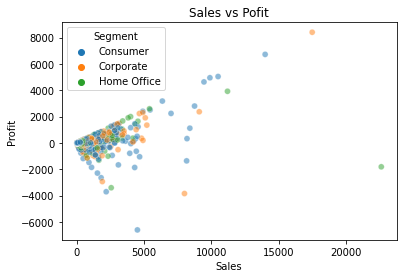

In [18]:
# generating a scatter plot for sales vs profit diffrentiated by segment
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Segment', alpha=0.5)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Pofit')
plt.show();

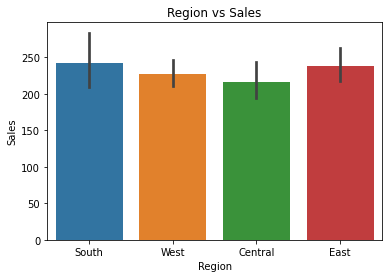

In [19]:
# generating bar plot for sales by region
sns.barplot(x='Region', y='Sales', data=df)
plt.title('Region vs Sales')
plt.show();

In [20]:
# using linregress to compute the linear regression
#importing library
from scipy.stats import linregress

# Extract the variables
xs = df['Sales']
ys = df['Profit']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.18008214269772202, intercept=-12.755577764286315, rvalue=0.47906731413821774, pvalue=0.0, stderr=0.0033037138984100193)


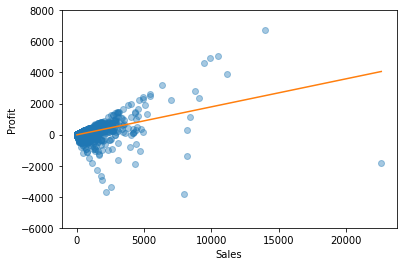

In [21]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.5, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.4)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=1)

plt.xlabel('Sales')
plt.ylabel('Profit')
plt.ylim([-6000, 8000])
plt.show()



> we find that we have a positive linear relationship between Sales and Profit



In [22]:
import statsmodels.formula.api as smf

# Run regression with StatsModels
results = smf.ols('Profit ~ Sales', data=df).fit()
print(results.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept   -12.755578
Sales         0.180082
dtype: float64


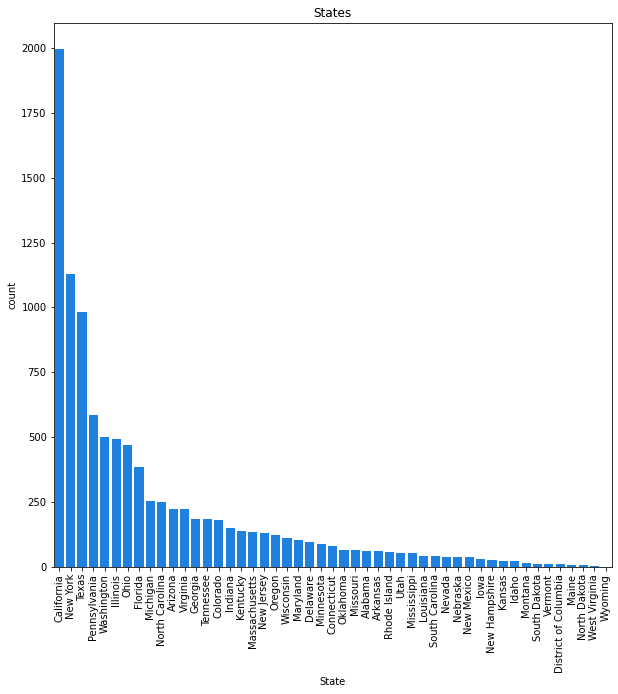

In [23]:
# generating a countplot for states
plt.figure(figsize=(10,10))
sns.countplot(x=df['State'],order=df['State'].value_counts().index, color='#0080FF')
plt.xticks(rotation=90)
plt.title("States")
plt.show();

<function matplotlib.pyplot.show>

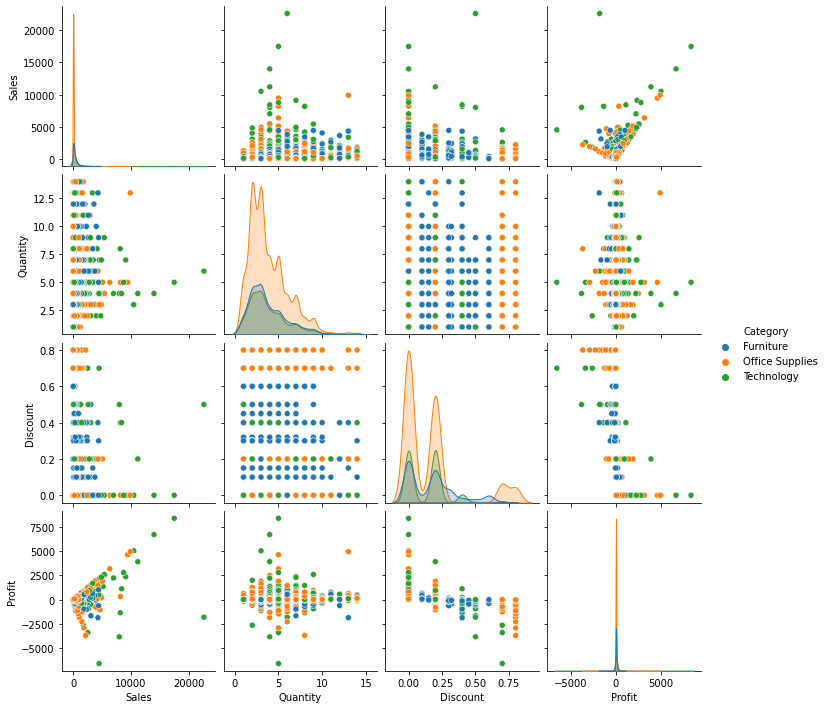

In [24]:
#generating a pairplots by category
figsize=(15,15)
sns.pairplot(df,hue='Category')
plt.show



> The most sales are for office supplies



In [25]:
#mapping the States names for the plotly dashboard
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
              'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
              'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME',
              'Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO',
              'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM',
              'New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR',
              'Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN',
              'Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA',
              'West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
df['state_code'] = df.State.apply(lambda x: state_code[x])

In [26]:
# generating a dashboard using plotly
state_data = df[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'purp',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

In [27]:
def state_data_viewer(states):
    """Plots the turnover generated by different product categories and sub-categories for the list of given states.
    Args:
        states- List of all the states you want the plots for
    Returns:
        None
    """
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

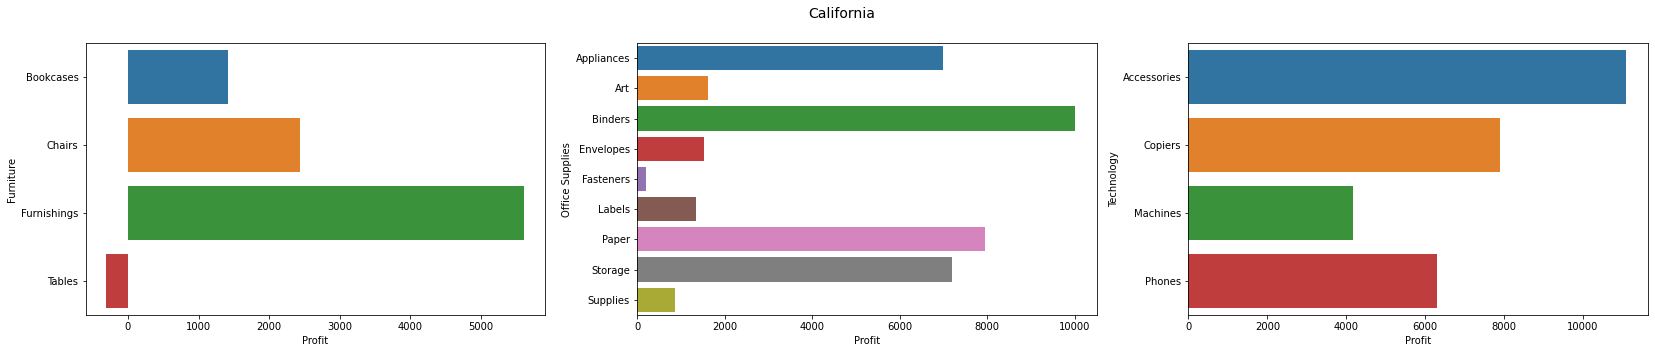

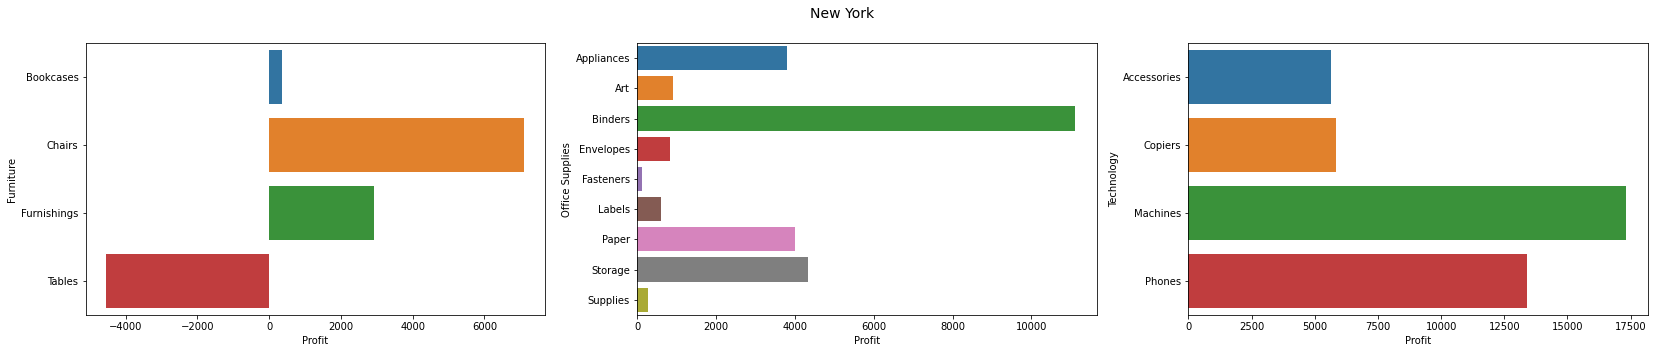

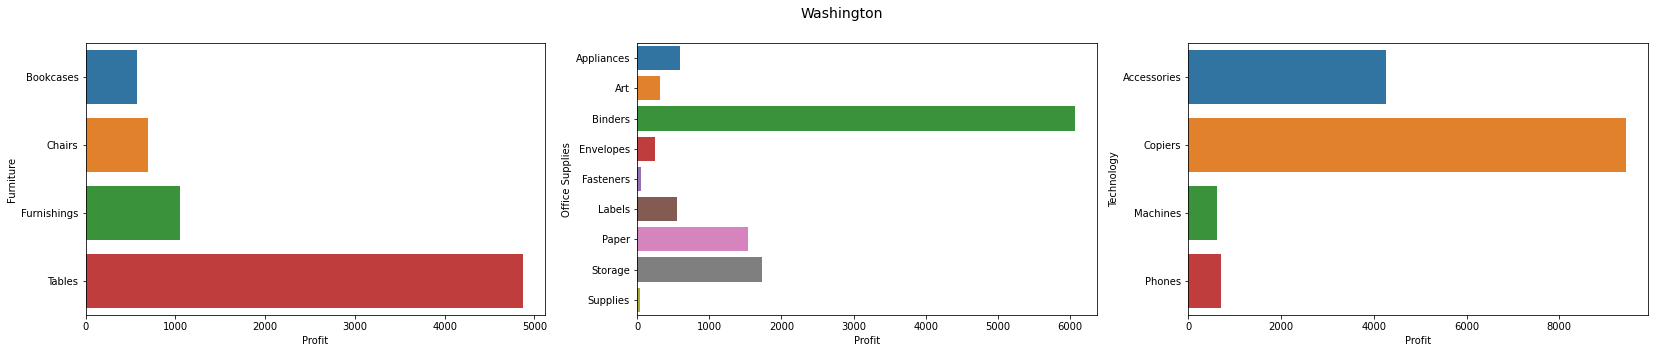

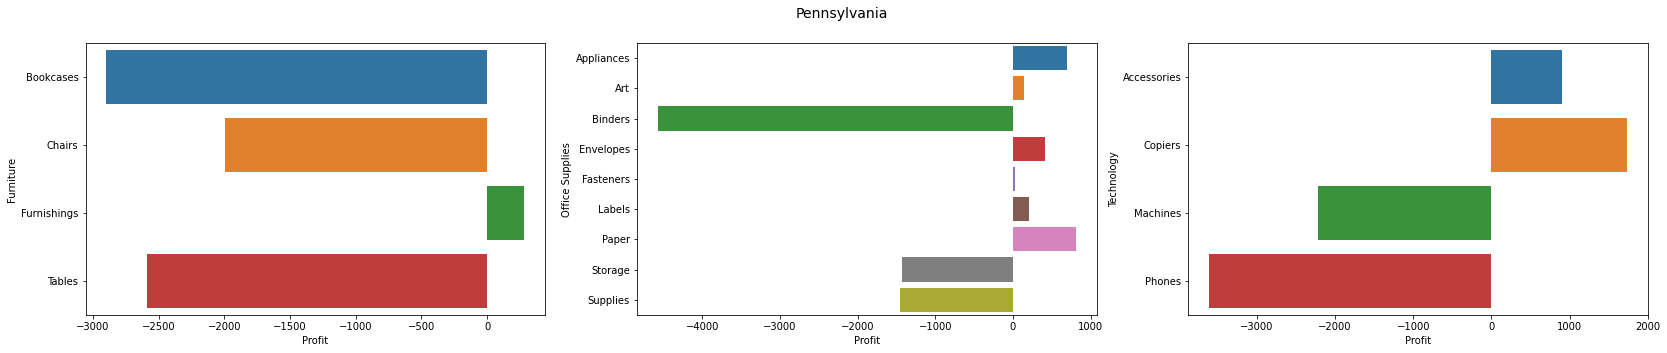

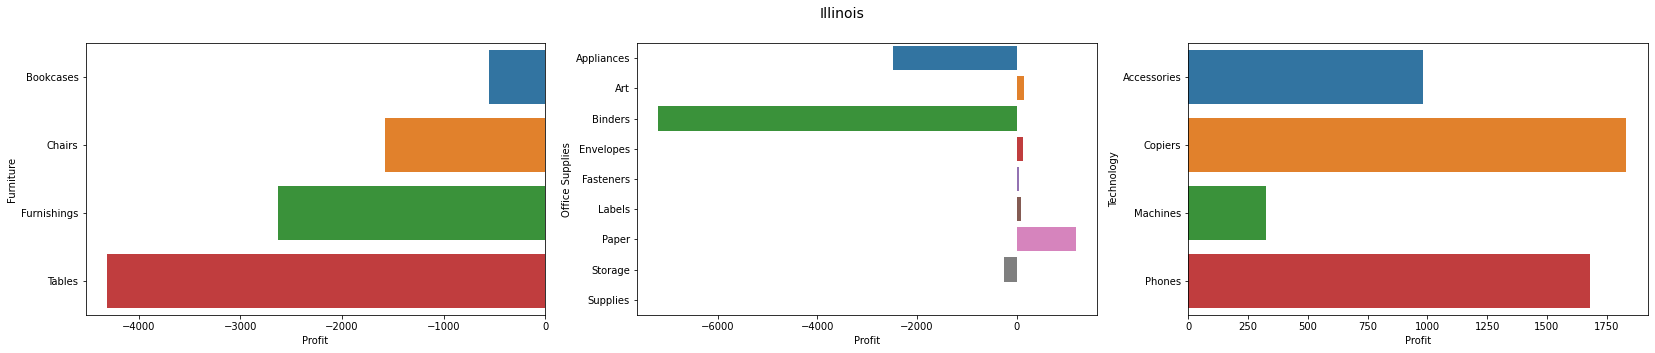

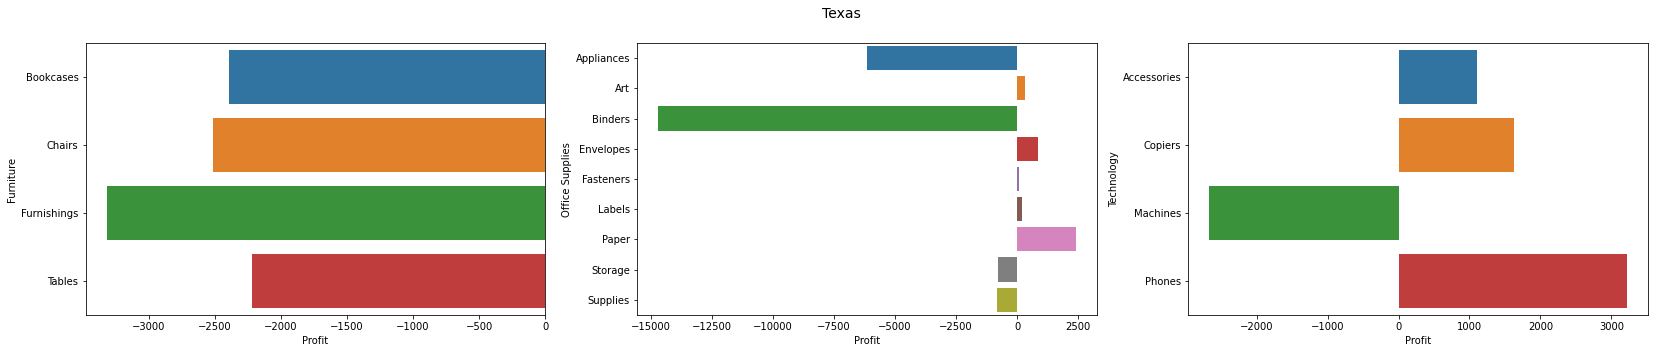

In [28]:
# using state_data_viewer function to polot the top six states in sales divided by category
states = ['California', 'New York', 'Washington', 'Pennsylvania', 'Illinois', 'Texas']
state_data_viewer(states)